# <span style="font-family:Georgia; text-align:center;">Actividad 4 — Arreglos y matrices en NumPy </span> 
<span style="font-family:Georgia;">


**Objetivo.** Resolver problemas aplicados usando arreglos y matrices de NumPy y **visualizar** resultados con **matplotlib** (`plot`, `scatter`, `hist`). 
Todos los **datos ya están cargados** en cada ejercicio; tu trabajo es **escribir el código** que responda a las preguntas.

**Indicaciones generales**:
- Importa `numpy` como `np` y `matplotlib.pyplot` como `plt`.
- Evita bucles cuando sea posible; prefiere **vectorización**, **máscaras** y **operaciones por ejes**.
- No modifiques las celdas de datos (solo las celdas indicadas para tu solución).
- Si un resultado pide “índice” o “posición”, considera si se refiere a índice (base 0) o a “día/cliente/producto” nominal.

- Al graficar:
  - Usa **matplotlib** (no seaborn).
  - **Cada gráfica** en su **propia figura** (`plt.figure()`); **no uses subplots**.
  - No establezcas colores ni estilos específicos.
  - Incluye **título**, **etiquetas de ejes**, y cuando corresponda **leyenda**, **grid** y **ticks** personalizados.
  - Si guardas figuras: `plt.savefig("nombre.png", dpi=150, bbox_inches="tight")`.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## <span style="font-family:Georgia; text-align:center;">Matplotlib (ejemplos) </span> 
<span style="font-family:Georgia;"> 

A continuación algunos ejemplos mínimos de uso de `plot`, `scatter` y `hist`, y personalización básica.  
Recuerda: **una figura por gráfica** (`plt.figure()`).


### <span style="font-family:Georgia; text-align:center;">Plot</span> 

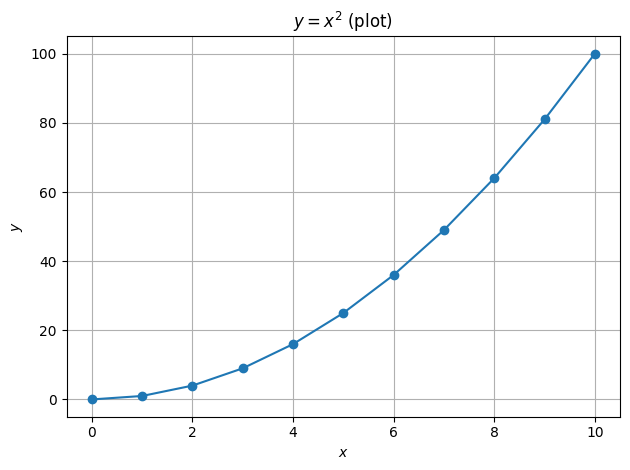

In [ ]:
# Ejemplo 0.1 — Línea básica con `plot`
x = np.arange(0, 11)
y = x**2

plt.figure()
plt.plot(x, y, marker='o')  # sin especificar color
plt.title("$y = x^2$ (plot)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid(True) # grafica con malla
plt.tight_layout() # ajusta márgenes
# plt.savefig("ejemplo_plot.png", dpi=150, bbox_inches="tight") # guarda figura
plt.show()


### <span style="font-family:Georgia; text-align:center;">Scatter</span> 

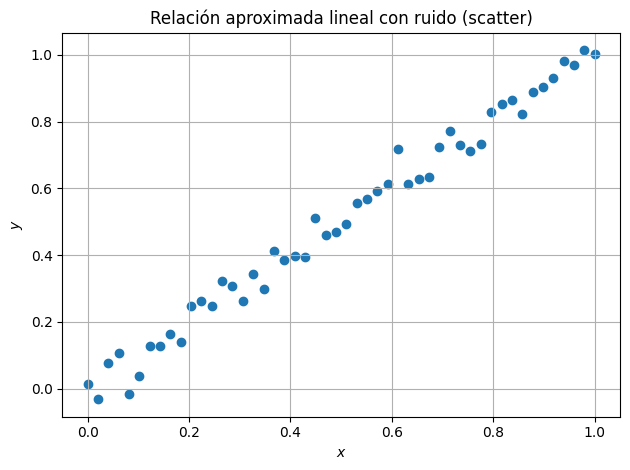

In [7]:
# Ejemplo 0.2 — Dispersión con `scatter`
rng = np.random.default_rng(42)
x = np.linspace(0, 1, 50)
y = x + rng.normal(scale=0.05, size=x.size)

plt.figure()
plt.scatter(x, y)  # sin especificar color
plt.title("Relación aproximada lineal con ruido (scatter)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid(True)
plt.tight_layout()
# plt.savefig("ejemplo_scatter.png", dpi=150, bbox_inches="tight") # guarda figura
plt.show()


### <span style="font-family:Georgia; text-align:center;">Histogramas</span> 

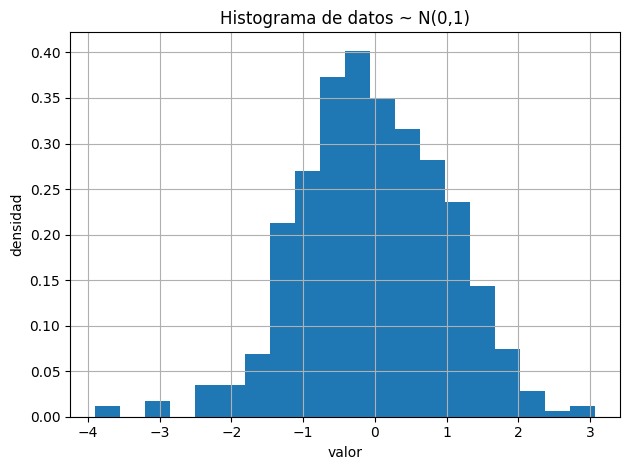

In [ ]:
# Ejemplo 0.3 — Histograma con `hist`
rng = np.random.default_rng(0) # semilla fija
data = rng.normal(loc=0.0, scale=1.0, size=500)

plt.figure()
plt.hist(data, bins=20, density=True)  # sin especificar color
plt.title("Histograma de datos ~ N(0,1)")
plt.xlabel("valor")
plt.ylabel("densidad")
plt.grid(True)
plt.tight_layout()
# plt.savefig("ejemplo_hist.png", dpi=150, bbox_inches="tight") # guarda figura
plt.show()


### <span style="font-family:Georgia; text-align:center;">Personalización de gráficas</span> 

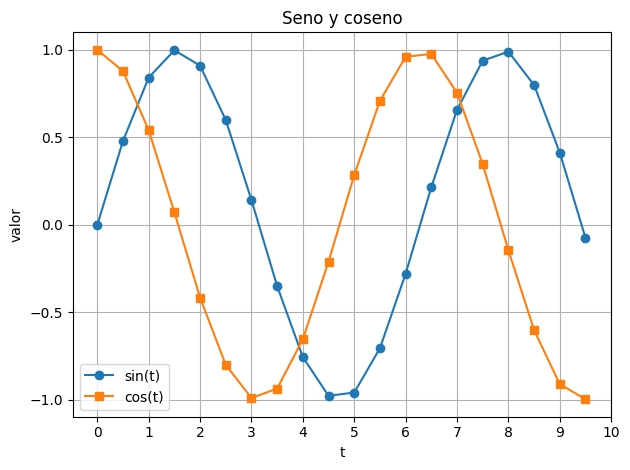

In [9]:
# Ejemplo 0.4 — Dos series en una figura, ticks y leyenda
t = np.arange(0, 10, 0.5)
serie1 = np.sin(t)
serie2 = np.cos(t)

plt.figure()
plt.plot(t, serie1, marker='o', label='sin(t)')
plt.plot(t, serie2, marker='s', label='cos(t)')
plt.title("Seno y coseno")
plt.xlabel("t")
plt.ylabel("valor")
plt.grid(True)
plt.legend()
# Personaliza ticks (opcional)
plt.xticks(np.arange(0, 10.1, 1.0))
plt.yticks(np.arange(-1.0, 1.1, 0.5))
plt.tight_layout()
# plt.savefig("ejemplo_lineas.png", dpi=150, bbox_inches="tight") # guarda figura
plt.show()


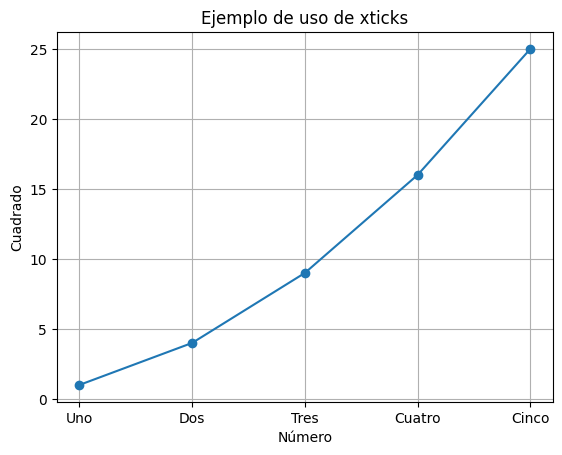

In [3]:
# Ejemplo 0.5 — Personalización de ticks con `xticks`
# Datos de ejemplo
x = np.arange(1, 6)
y = x**2

plt.figure()
plt.plot(x, y, marker="o")

# Personalizar ticks del eje x
plt.xticks([1, 2, 3, 4, 5], ["Uno", "Dos", "Tres", "Cuatro", "Cinco"])

plt.title("Ejemplo de uso de xticks")
plt.xlabel("Número")
plt.ylabel("Cuadrado")
plt.grid(True)
plt.show()


### <span style="font-family:Georgia; text-align:center;">Guardar figura a archivo</span> 

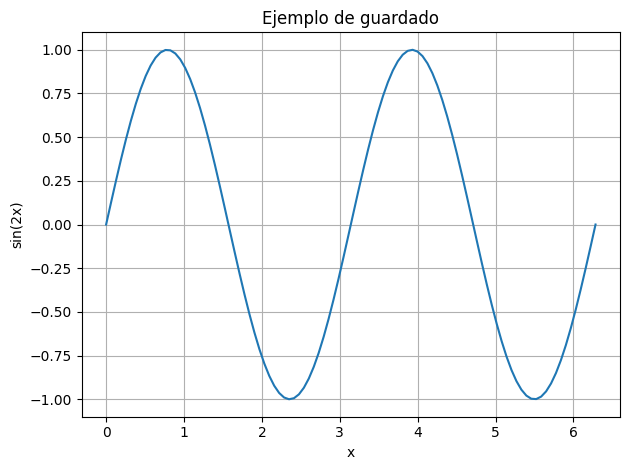

In [10]:
# Ejemplo 0.5 — Guardar figura a archivo
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(2*x)

plt.figure()
plt.plot(x, y)
plt.title("Ejemplo de guardado")
plt.xlabel("x")
plt.ylabel("sin(2x)")
plt.grid(True)
plt.tight_layout()
plt.savefig("ejemplo_guardado.png", dpi=150, bbox_inches="tight")
# Archivo guardado en el directorio del notebook.


## <span style="font-family:Georgia; text-align:center;">Ejercicio 1 — Encuesta </span> 
<span style="font-family:Georgia;"> 

Se encuestó a **10 personas** en una escala **1–5** sobre 4 aspectos:  
`Servicio`, `Calidad`, `Precio`, `Entrega`.

**Tareas de análisis:**
1. Calcula la **media por aspecto** (vector de 4 elementos).
2. Calcula la **desviación estándar por cliente** (vector de 10) y encuentra el **cliente con mayor variabilidad**.
3. Indica **qué aspecto** obtuvo el **promedio más bajo**.
4. Calcula, por aspecto, cuántas respuestas fueron **≥ 4** (conteo de satisfechos).

**Tareas de visualización:**
- `hist`: Para **cada aspecto**, un histograma de sus 10 respuestas.
- `plot`: Gráfica de la **media por aspecto**.
- `scatter`: Diagrama de dispersión **cliente vs desviación estándar** (índice de cliente en el eje x).

> No modifiques los datos. Escribe tus respuestas en variables con nombres sugeridos.


In [3]:
# Datos del ejercicio 1
clientes = np.array(["C1","C2","C3","C4","C5","C6","C7","C8","C9","C10"])
aspectos = np.array(["Servicio","Calidad","Precio","Entrega"])

# Matriz con de respuestas (enteros 1-5)
respuestas = np.array([
    [4,5,3,4],
    [3,4,2,3],
    [5,5,2,5],
    [2,3,2,3],
    [4,4,3,5],
    [5,4,2,4],
    [3,4,3,4],
    [4,5,2,5],
    [2,3,3,3],
    [4,4,2,4]
], dtype=int)

respuestas.shape


(10, 4)

In [ ]:
# === Tu código (Ejercicio 2) ===
# Calcula y guarda en las siguientes variables:
# - media_por_aspecto (shape: (4,))
# - desv_por_cliente (shape: (10,))
# - cliente_mayor_var (índice o nombre del cliente con mayor desviación estándar)
# - aspecto_promedio_mas_bajo (índice o nombre del aspecto con menor media)
# - satisfechos_por_aspecto (conteo de respuestas >= 4, shape: (4,))

# Escribe tu solución abajo:



## <span style="font-family:Georgia; text-align:center;">Ejercicio 2 — Temperaturas  </span> 
<span style="font-family:Georgia;"> 

Se registraron temperaturas diarias (°C) durante **30 días** en **3 ciudades**:  
`Ciudad Costera`, `Ciudad Interior`, `Ciudad Alta`.

**Tareas de análisis:**
1. Calcula el **promedio mensual por ciudad** (vector de 3).
2. Determina el **día y ciudad del valor máximo global** (usa índices o nombres).
3. Cuenta, por ciudad, cuántos **días > 30 °C**.

**Tareas de visualización:**
- `plot`: Serie temporal de **30 días** para las **3 ciudades** en la **misma figura** (incluye leyenda y grid).
- `hist`: Un histograma **por ciudad** de sus 30 temperaturas (una figura por ciudad).
- `scatter`: Dispersión **día vs temperatura** para la **Ciudad Interior** (resalta la ola de calor).

> No modifiques los datos.


In [ ]:
# Datos del ejercicio 2
ciudades = np.array(["Ciudad Costera","Ciudad Interior","Ciudad Alta"])

# Matriz 30x3: cada columna es una ciudad, cada fila es un día del mes.
# Valores en °C (redondeados), con una ola de calor en la ciudad interior hacia la segunda mitad del mes.
temps = np.array([
    [26.4, 33.1, 20.6],
    [25.7, 32.0, 20.5],
    [26.9, 33.3, 20.8],
    [25.8, 31.5, 19.9],
    [26.1, 30.8, 20.1],
    [26.0, 31.4, 20.2],
    [26.4, 33.0, 19.9],
    [25.7, 32.6, 20.3],
    [26.2, 31.9, 19.8],
    [26.1, 31.9, 20.1],
    [26.0, 30.7, 20.0],
    [25.8, 32.5, 20.2],
    [26.5, 32.2, 19.9],
    [25.6, 30.9, 20.1],
    [26.2, 31.9, 20.0],
    [26.1, 31.3, 19.8],
    [26.0, 30.1, 20.2],
    [25.7, 36.2, 20.1],
    [26.2, 35.1, 19.9],
    [26.2, 33.0, 20.2],
    [26.0, 31.5, 19.8],
    [25.6, 31.0, 20.0],
    [26.3, 30.8, 20.1],
    [25.9, 31.2, 20.1],
    [26.1, 30.0, 20.3],
    [26.0, 30.1, 19.9],
    [26.1, 31.3, 20.1],
    [25.8, 29.9, 20.2],
    [26.3, 31.2, 19.9],
    [25.9, 29.9, 20.0]
])

temps.shape


In [ ]:
# === Tu código (Ejercicio 2) ===
# Calcula y guarda en las siguientes variables:
# - promedio_por_ciudad (shape: (3,))
# - indice_max_global (tupla (dia_idx, ciudad_idx) o equivalente)
# - ciudad_max_global (nombre de la ciudad del máximo global)
# - dias_sobre_30 (vector de 3 enteros: cuenta de días con temp > 30 °C por ciudad)

# Escribe tu solución abajo:



## <span style="font-family:Georgia; text-align:center;">Ejercicio 3 — Inventario</span> 
<span style="font-family:Georgia;">  

Durante **7 días**, se registró el **inventario** de **6 productos** (unidades en anaquel):  
`Arroz`, `Leche`, `Pan`, `Huevos`, `Cereal`, `Jugo`.

**Tareas de análisis:**
1. ¿Qué **producto** tuvo el **inventario promedio** más **bajo**?
2. ¿En qué **día** se **agotaron** (inventario 0) **más productos**?
3. Simula una **reposicón de +5 unidades** a **todos los productos** y **actualiza** la matriz (crear una nueva matriz).

**Tareas de visualización:**
- `plot`: Serie de **inventario vs día** para **cada producto** (una figura por producto; puedes usar un bucle).
- `scatter`: Dispersión **día vs inventario** para los **2 productos más volátiles** (mayor desviación estándar).
- `hist`: Histograma de inventarios de un producto específico a lo largo de la semana.


> No modifiques los datos.

In [ ]:
# Datos del ejercicio 3
productos = np.array(["Arroz","Leche","Pan","Huevos","Cereal","Jugo"])
dias = np.array(["Día 1","Día 2","Día 3","Día 4","Día 5","Día 6","Día 7"])

inventario = np.array([
    [12,20,15,8,9,5],
    [10,18,10,6,8,4],
    [ 8,16, 0,4,7,3],
    [ 7,12, 8,3,6,2],
    [ 5, 8, 6,2,6,0],
    [ 3, 4, 3,1,5,0],
    [ 0, 2, 0,0,3,4]
], dtype=int)

inventario.shape


In [ ]:
# === Tu código (Ejercicio 3) ===
# Calcula y guarda en las siguientes variables:
# - producto_promedio_mas_bajo (índice o nombre)
# - dia_con_mas_agotados (índice o nombre)
# - inventario_repuesto (nueva matriz con +5 en todas las entradas)

# Escribe tu solución abajo:



## <span style="font-family:Georgia; text-align:center;">Ejercicio 4 — Ventas</span> 
<span style="font-family:Georgia;"> 

Se registraron **ventas semanales** (en **miles de pesos**) de **3 sucursales** durante **8 semanas**:  
`Centro`, `Norte`, `Sur`.

**Tareas de análisis:**
1. Calcula las **ventas totales por sucursal** (vector de 3).
2. Calcula las **ventas semanales totales** (vector de 8).
3. Indica **qué semana** tuvo las **mayores ventas globales**.
4. (Extra) Calcula la **participación porcentual** de cada sucursal por semana (matriz 8×3).

**Tareas de visualización:**
- `plot`: Serie temporal de **ventas por semana** (totales) y, en otra figura, por **sucursal**.
- `hist`: Histograma de **ventas semanales totales** (8 valores).
- `scatter`: Dispersión **semana vs participación** para **una sucursal** (por ejemplo, `Centro`).

> No modifiques los datos.


In [ ]:
# Datos del ejercicio 4
sucursales = np.array(["Centro","Norte","Sur"])
semanas = np.array(["Sem 1","Sem 2","Sem 3","Sem 4","Sem 5","Sem 6","Sem 7","Sem 8"])

ventas = np.array([
    [180, 150, 130],
    [190, 155, 135],
    [200, 160, 150],
    [210, 170, 160],
    [220, 180, 170],
    [300, 250, 240],  # Promoción
    [230, 185, 175],
    [240, 190, 180]
], dtype=int)

ventas.shape


In [ ]:
# === Tu código (Ejercicio 4) ===
# Calcula y guarda en las siguientes variables:
# - total_por_sucursal (shape: (3,))
# - total_semanal (shape: (8,))
# - semana_mayor_venta (índice o nombre)
# - participacion_porcentual (matriz 8x3, opcional)

# Escribe tu solución abajo:



## <span style="font-family:Georgia; text-align:center;">Ejercicio 5 — Datos médicos</span> 
<span style="font-family:Georgia;"> 

Se tienen **pesos** (kg) y **alturas** (m) de **12 pacientes**. El **IMC** se define como  
$$ 
IMC = \frac{peso}{altura^2} 
$$

**Tareas de análisis:**
1. Calcula el **IMC** de cada paciente (vector de 12).
2. Usa **máscaras booleanas** para clasificar: **normal** (18.5–24.9), **sobrepeso** (25–29.9) y **obesidad** (≥30).
3. Calcula la **proporción** de pacientes en cada categoría.

**Tareas de visualización:**
- `hist`: Histograma de **IMC** (elige bins razonables).
- `scatter`: **Altura vs peso**; superpone las 3 categorías (3 llamadas a `plt.scatter`) y agrega leyenda.
- `plot`: Ordena los pacientes por IMC y grafica la curva (índice ordenado vs IMC).

> No modifiques los datos.


In [4]:
# Datos del ejercicio 5
pacientes = np.array(["P1","P2","P3","P4","P5","P6","P7","P8","P9","P10","P11","P12"])

alturas_m = np.array([1.62,1.75,1.68,1.80,1.55,1.70,1.65,1.73,1.60,1.82,1.58,1.77])
pesos_kg  = np.array([ 52,  85,  72,  95,  60,  68,  75,  80,  48, 110,  78,  70])

alturas_m.shape, pesos_kg.shape


((12,), (12,))

In [ ]:
# === Tu código (Ejercicio 5) ===
# Calcula y guarda en las siguientes variables:
# - imc (vector de 12)
# - mask_normal, mask_sobrepeso, mask_obesidad (booleanos de shape (12,))
# - proporcion_normal, proporcion_sobrepeso, proporcion_obesidad (float)

# Escribe tu solución abajo:



## <span style="font-family:Georgia; text-align:center;">Ejercicio 6 — Consumo energético</span> 
<span style="font-family:Georgia;">  

Se tiene el consumo **diario** de energía (kWh) durante **7 días**, en **3 franjas** (`Mañana`, `Tarde`, `Noche`) y **4 hogares**.

**Tareas de análisis:**
1. Calcula el **consumo total por hogar** en la semana (vector de 4).
2. Encuentra el **(día, franja)** del **pico de consumo global**.
3. Calcula el **porcentaje de consumo nocturno** sobre el total semanal (scalar o vector por hogar).
4. Ordena los hogares por **consumo nocturno** (de mayor a menor).

**Tareas de visualización:**
- `plot`: Para **cada hogar**, serie de **consumo total diario** (suma por franjas) a lo largo de 7 días (una figura por hogar).
- `plot`: Serie de **consumo nocturno** por día (agregando hogares o por hogar).
- `hist`: Histograma del **consumo nocturno agregado** (todas las observaciones de `Noche`).

> No modifiques los datos. Hay efecto de fin de semana (más consumo en `Noche` y `Tarde`).


In [5]:
# Datos del ejercicio 6
franjas = np.array(["Mañana","Tarde","Noche"])
hogares = np.array(["H1","H2","H3","H4"])
dias_semana = np.array(["Lun","Mar","Mié","Jue","Vie","Sáb","Dom"])

# Tensor (7,3,4): día × franja × hogar; valores en kWh
consumo = np.array([
    [[4.1, 3.6, 4.6, 3.9],
     [7.4, 6.4, 6.9, 5.9],
     [7.6, 6.1, 6.6, 6.4]],

    [[4.1, 3.6, 4.6, 3.9],
     [7.3, 6.3, 6.8, 5.8],
     [7.5, 6.0, 6.5, 6.3]],

    [[4.2, 3.7, 4.7, 4.0],
     [7.5, 6.5, 7.0, 6.0],
     [7.7, 6.2, 6.7, 6.5]],

    [[4.2, 3.7, 4.7, 4.0],
     [7.6, 6.6, 7.1, 6.1],
     [7.8, 6.3, 6.8, 6.6]],

    [[4.1, 3.6, 4.6, 3.9],
     [7.2, 6.2, 6.7, 5.7],
     [7.4, 5.9, 6.4, 6.2]],

    [[4.0, 3.5, 4.5, 3.8],
     [7.3, 6.3, 6.8, 5.8],
     [7.5, 6.0, 6.5, 6.3]],

    [[3.9, 3.4, 4.4, 3.7],
     [7.4, 6.4, 6.9, 5.9],
     [7.7, 6.2, 6.7, 6.5]]
])

consumo.shape


(7, 3, 4)

In [ ]:
# === Tu código (Ejercicio 6) ===
# Calcula y guarda en las siguientes variables:
# - total_por_hogar (vector de 4)
# - indice_pico (tupla (dia_idx, franja_idx, hogar_idx) o solo (dia_idx, franja_idx) si max es por franja)
# - porcentaje_nocturno (scalar o vector por hogar)
# - hogares_ordenados_por_noche (índices o nombres)

# Escribe tu solución abajo:

